# Bike Sharing Assignment

## Problem Statement:-


    
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:-

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# 1. Importing Library

In [1]:
# Importing required Library
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing train_test_split and MinMaxScalar library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Importing VIF and r2_score library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# 2. Read and understand the data

In [2]:
#Loading the data into dataframe
bike= pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of the dataset
bike.shape

(730, 16)

In [4]:
# Checking the summary
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Analysis :
 1. 'cnt' is the target variable
 2. Total 730 rows and 16 columns are present in the dataset

# 3. Data Cleaning 

In [5]:
# checking null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no null values present in the dataset

In [6]:
# checking duplicate values in the dataset
bike.duplicated().sum()

0

There is no duplicate values present in the dataset

# Dropping the Column which are not useful for analysis

Looking at the dataset, 4 columns are not useful for analysis
1. Instant - It's showing only index values, so we will drop the column
2. dteday - month and year columns are already extracted, so we will drop this column too
3. Casual and registered - In the dataset 'cnt' is the target variable and sum of casual and registered is equal to cnt. so we will drop these two columns

In [7]:
#drop the instant, casual, registered
bike =bike.drop(['instant','dteday','casual','registered'],axis=1)
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [8]:
# checking shape after dropping the columns
bike.shape

(730, 12)

# 4. Exploratory Data Analysis

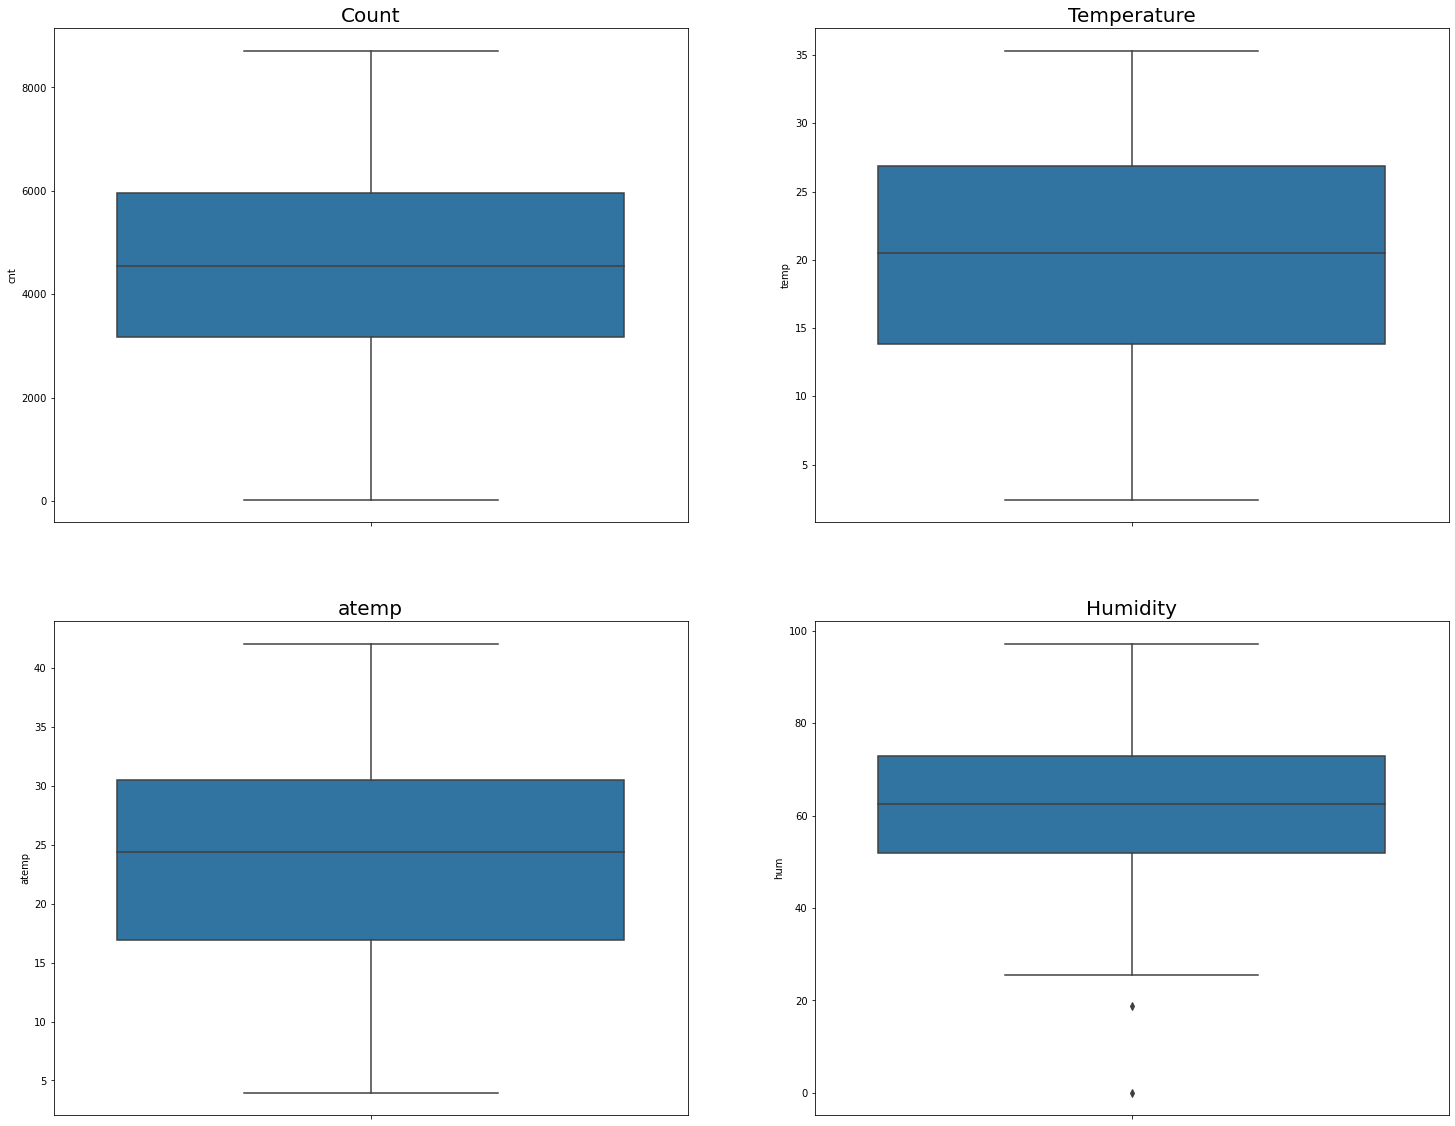

In [9]:
# Creating box plot for Numerical variables
plt.figure(figsize=(25, 20))
plt.subplot(2,2,1)
sns.boxplot( y = 'cnt', data = bike)
plt.title('Count',fontsize=20)
plt.subplot(2,2,2)
sns.boxplot(y = 'temp', data = bike)
plt.title('Temperature',fontsize=20)
plt.subplot(2,2,3)
sns.boxplot( y = 'atemp', data = bike)
plt.title('atemp',fontsize=20)
plt.subplot(2,2,4)
sns.boxplot( y = 'hum', data = bike)
plt.title('Humidity',fontsize=20)
plt.show()

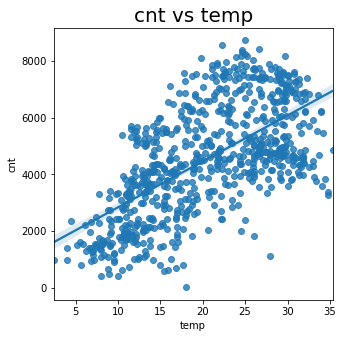

In [10]:
# Visualising numerical variables with target variables
plt.figure(figsize=[5,5])
plt.title('cnt vs temp',fontsize=20)
sns.regplot(x='temp',y='cnt',data=bike)
plt.show()

1. It's shows that temp is positively correlated with target varaible 'cnt'
2. If temperature increases, the cnt also increase. 

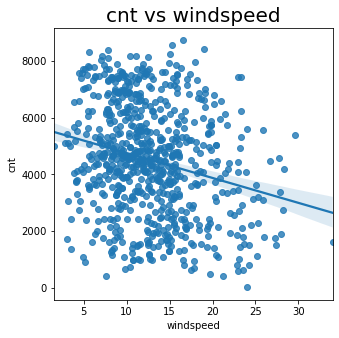

In [11]:
# Visualising numerical variables with target variables
plt.figure(figsize=[5,5])
plt.title('cnt vs windspeed',fontsize=20)
sns.regplot(x='windspeed',y='cnt',data=bike)
plt.show()

1. The datapoints are scattered and it shows Negative correlation.
2. When cnt is increasing windspeed is decreasing

# Converting Columns into categorical variables

In [12]:
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [13]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


<AxesSubplot:>

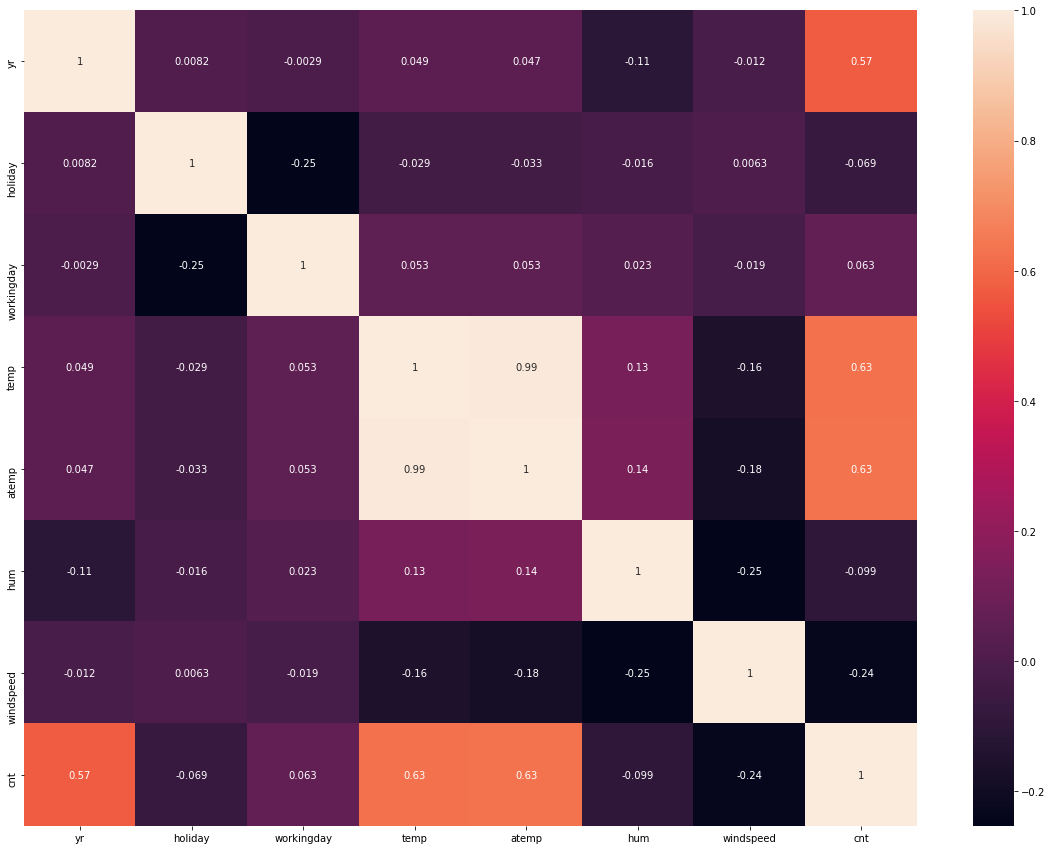

In [15]:
# visualizing the correlation of all the variables
plt.figure(figsize=[20,15])
sns.heatmap(bike.corr(),annot=True)

1. Temp and atemp is highy correlated with 0.99, so we can drop atemp variables

# Pair plot for Numerical variables

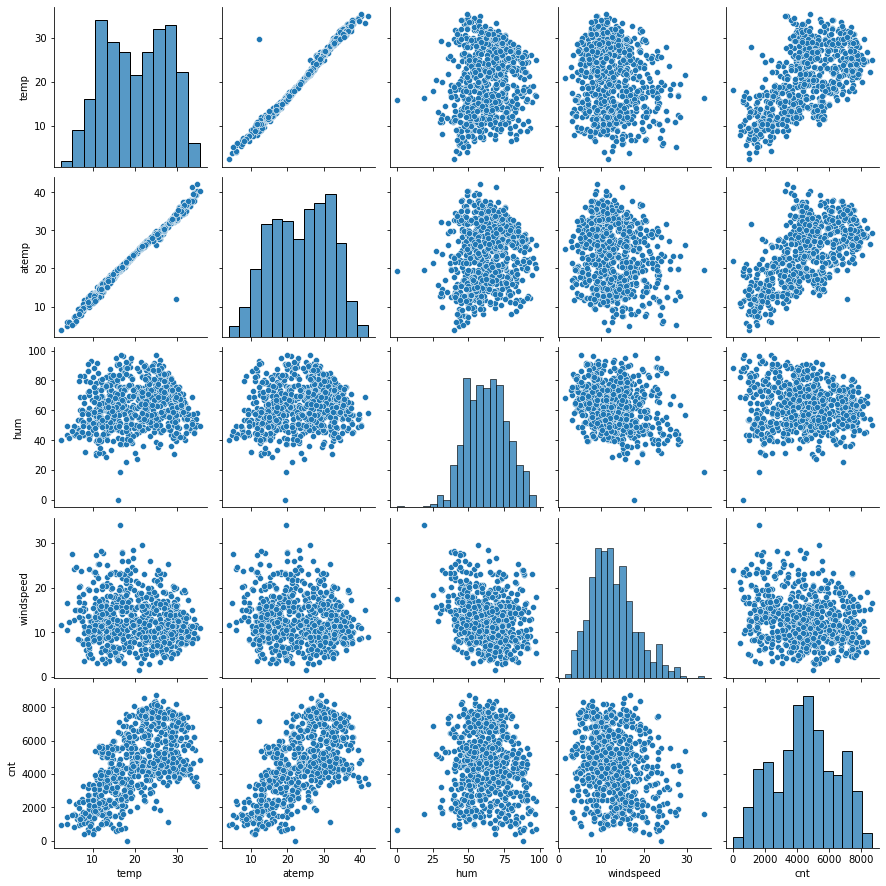

In [16]:
num_va = bike[['temp','atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(num_va)

1. Looking at the pair plots, we can see that the target variable 'cnt' has high correlation with 'temp' and 'atemp'
2. If temp and atemp is increases, the cnt also increase.

# Visualizing Categorical variables  with target variable

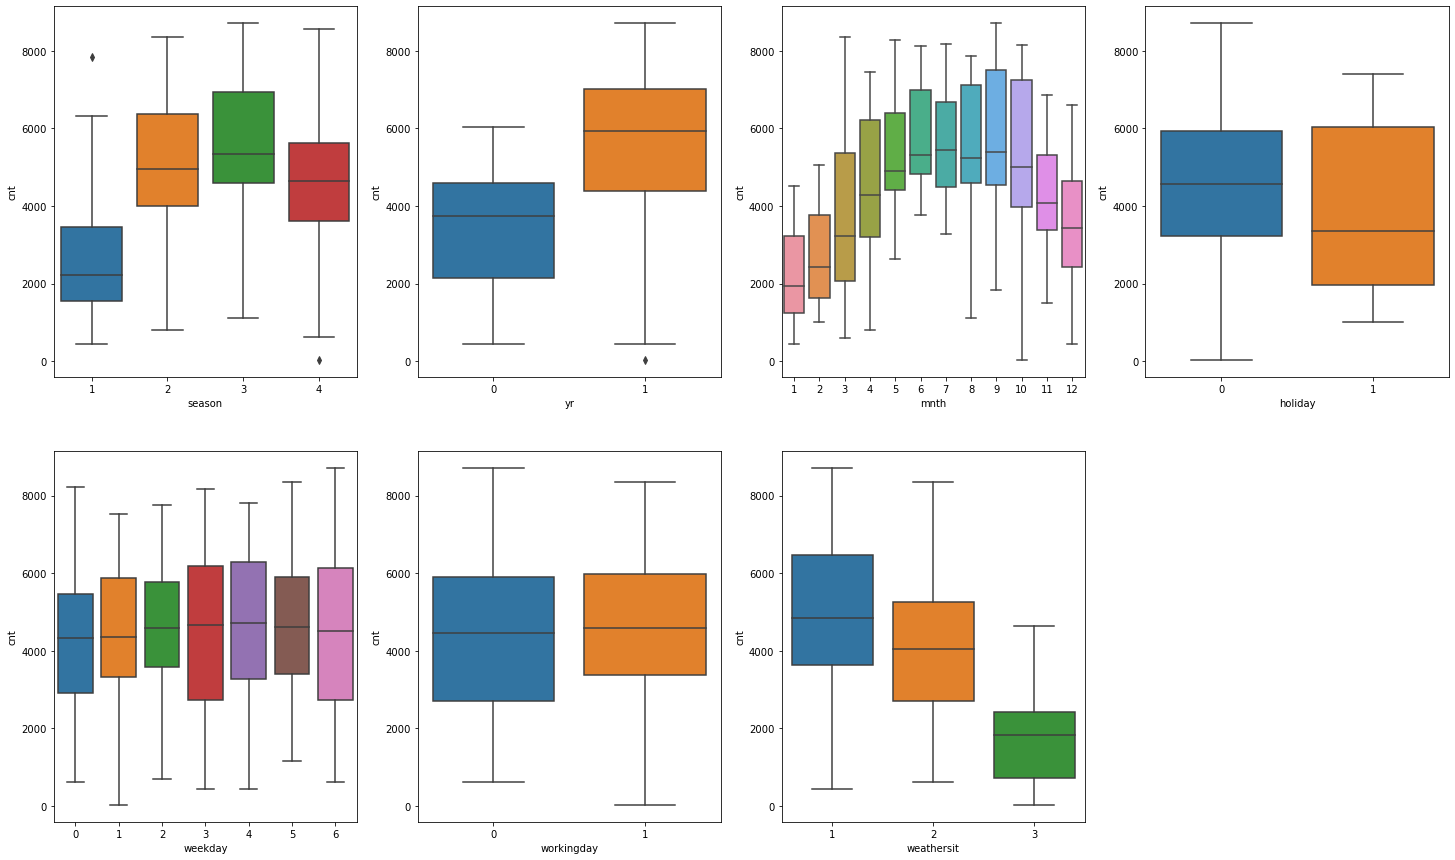

In [17]:
plt.figure(figsize=(25, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.show()

1. In first plot, the maximum number of bookings around 5000 in season_3 which is “Fall”.
2.	In second plot, the number of bookings is increased in year_1(2019) compared to previous year (2018).
3.	In third plot, the number of bookings is gradually increased from Month_1 to month_6 which is “Jan to June” and it decrease gradually. The maximum number of bookings is on month-6 which is “June”
4.	In fourth plot, when there is a holiday, the demand is decreased compared to working day.
5.	In plot five and six, there is no significant insights that we can make.
6.	In seventh plot, the count is increasing when the weather is Clear, Few clouds, partly cloudy, partly cloudy. There are no bookings when the weather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


# 5. Data Preparation

## Creating Dummy variables for Categorical variables

In [18]:
# Creating dummy variables for season, weather,month
bike = pd.get_dummies(bike,drop_first=True)

In [19]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

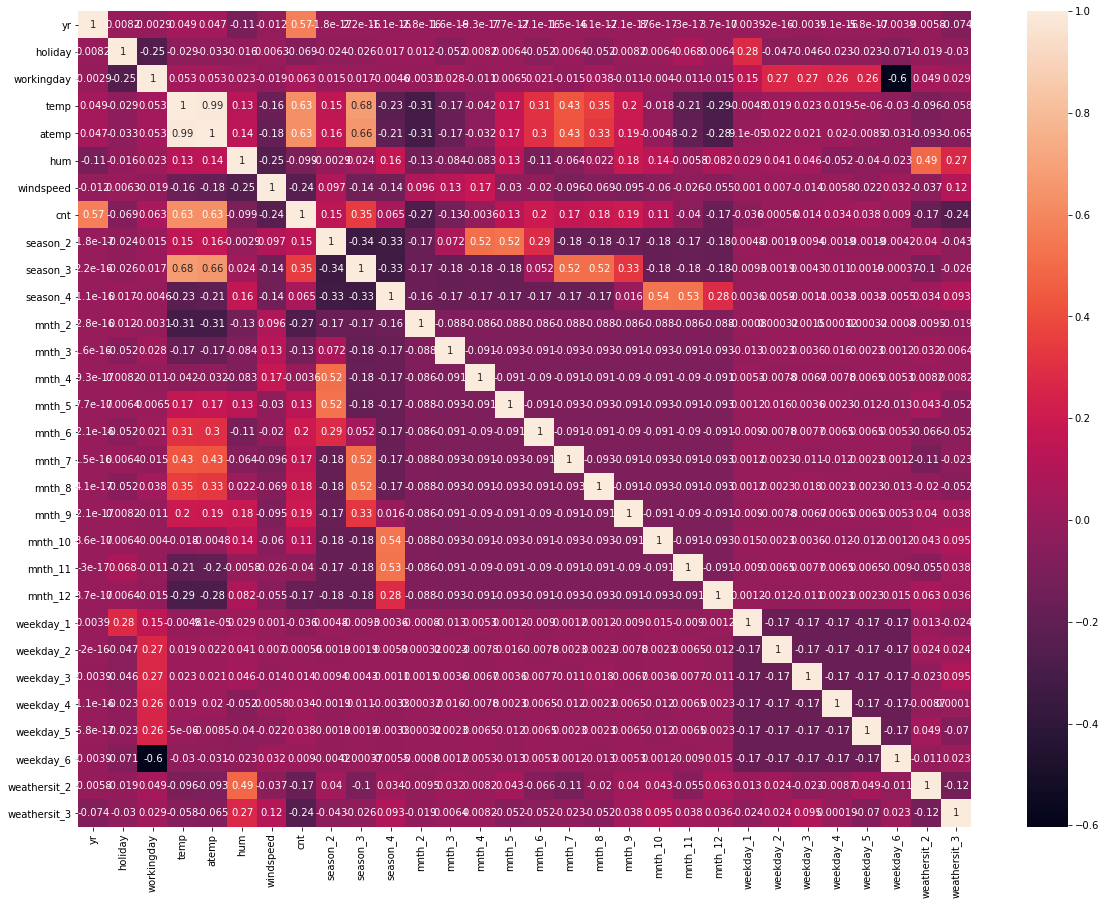

In [20]:
# Heatmap after creating dummy variables
plt.figure(figsize=[20,15])
sns.heatmap(bike.corr(),annot=True)

# Spliting the dataset and Feature Selection

In [21]:
# Spliting the dataset 
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 38)

In [22]:
#shape after the split the dataset
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Feature scaling for Continuous variables

In [23]:
num_vars = ['temp', 'atemp','hum', 'windspeed', 'cnt']

In [24]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
706,1,0,0,0.378139,0.397222,0.937018,0.162836,0.639669,0,0,...,0,1,0,0,0,0,0,1,1,0
579,1,0,1,0.889150,0.881676,0.660668,0.398705,0.822941,0,1,...,0,0,0,0,0,0,1,0,1,0
155,0,0,0,0.732854,0.727540,0.670951,0.239759,0.561896,1,0,...,0,0,0,0,0,0,0,0,1,0
538,1,0,0,0.843703,0.779840,0.549700,0.324343,0.855499,0,1,...,0,0,0,0,0,0,0,1,0,0
211,0,0,0,0.942358,0.891746,0.494430,0.293609,0.492407,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# statistics after scaling for Train set
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.021569,0.703922,0.523410,0.513615,0.646987,0.348496,0.511758,0.245098,0.252941,...,0.078431,0.086275,0.135294,0.141176,0.149020,0.154902,0.145098,0.145098,0.337255,0.035294
std,0.500429,0.145413,0.456974,0.245766,0.238120,0.149617,0.160536,0.228753,0.430568,0.435124,...,0.269113,0.281045,0.342373,0.348545,0.356457,0.362166,0.352545,0.352545,0.473237,0.184703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.310520,0.311439,0.534704,0.232053,0.338012,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.528339,0.530712,0.643316,0.328848,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741445,0.714689,0.756534,0.440702,0.690894,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Create X_train and Y_train

In [26]:
# y_train will be target varaible and X_train will be independent variables
y_train = df_train.pop('cnt')
X_train = df_train

## Using RFE method

In [27]:
# Linear regression model using sklearn for RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

# Reducing the number of features to 15 using automated approach
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [28]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', False, 4),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 11),
 ('weekday_1', False, 8),
 ('weekday_2', False, 15),
 ('weekday_3', False, 12),
 ('weekday_4', False, 14),
 ('weekday_5', False, 13),
 ('weekday_6', False, 5),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [30]:
#columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [31]:
# columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [32]:
X_train = X_train[col]

In [33]:
X_train.shape

(510, 15)

# 6. Model Buliding 

### Model -1  - Selected variables by 15

In [34]:
X_train.columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [35]:
# Adding a constant variable 
X_train_rfe_1 = sm.add_constant(X_train)
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe_1).fit()   
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.57e-188
Time:                        11:00:24   Log-Likelihood:                 503.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     494   BIC:                            -907.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2724      0.028      9.592   

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,323.19
3,atemp,306.54
4,hum,14.31
7,season_3,7.49
5,windspeed,4.49
6,season_2,3.71
8,season_4,2.83
13,weathersit_2,2.13
0,yr,2.01
10,mnth_8,1.87


1. P- value for month_5 (0.163) is very high, so let's drop month_5 column

# Model - 2 : Dropping month_5 variable

In [37]:
X_train_mnth_5 = X_train.drop(['mnth_5'],axis=1)

In [38]:
# Adding a constant variable 
X_train_rfe_2 = sm.add_constant(X_train_mnth_5)
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_rfe_2).fit()   
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.94e-189
Time:                        11:00:24   Log-Likelihood:                 502.75
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     495   BIC:                            -912.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2660      0.028      9.482   

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_mnth_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_mnth_5.values, i) for i in range(X_train_mnth_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,322.15
3,atemp,306.36
4,hum,14.27
7,season_3,7.36
5,windspeed,4.38
6,season_2,3.41
8,season_4,2.81
12,weathersit_2,2.13
0,yr,2.01
9,mnth_8,1.87


1. VIF value for atemp (306.36) and p-value (0.074) is very high, let drop atemp varaiable. 
2. VIF for temp is high but temp is imporatant variable for our analysis. So, don't drop temp variable.

# Model-3 : Dropping atemp variable

In [40]:
X_train_atemp = X_train_mnth_5.drop(['atemp'],axis=1)

In [41]:
# Adding a constant variable 
 
X_train_rfe_3 = sm.add_constant(X_train_atemp)
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_rfe_3).fit()   
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.87e-190
Time:                        11:00:24   Log-Likelihood:                 501.10
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -914.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2688      0.028      9.576   

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_atemp.columns
vif['VIF'] = [variance_inflation_factor(X_train_atemp.values, i) for i in range(X_train_atemp.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,19.39
3,hum,13.90
6,season_3,7.34
4,windspeed,4.25
5,season_2,3.41
7,season_4,2.80
11,weathersit_2,2.12
0,yr,2.01
8,mnth_8,1.84
10,mnth_10,1.64


1. p- value of month_8 (0.012) is high, let's drop the month_8 variable


# Model 4 : Dropping month_8 variable

In [43]:
X_train_mnth_8 = X_train_atemp.drop(['mnth_8'],axis=1)

In [44]:
# Adding a constant variable 
 
X_train_rfe_4 = sm.add_constant(X_train_mnth_8)
# Running the linear model
lm_3 = sm.OLS(y_train,X_train_rfe_4).fit()  
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.49e-189
Time:                        11:00:25   Log-Likelihood:                 497.87
No. Observations:                 510   AIC:                            -969.7
Df Residuals:                     497   BIC:                            -914.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2645      0.028      9.390   

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_mnth_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_mnth_8.values, i) for i in range(X_train_mnth_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,19.39
3,hum,13.88
6,season_3,6.36
4,windspeed,4.24
5,season_2,3.41
7,season_4,2.79
10,weathersit_2,2.12
0,yr,2.01
9,mnth_10,1.64
8,mnth_9,1.29


1. VIF value for hum (0.13.88) is high, let's drop the hum variable

# Model - 5: Dropping Humidity 

In [46]:
X_train_hum = X_train_mnth_8.drop(['hum'],axis=1)

In [47]:
# Adding a constant variable 
X_train_rfe_5 = sm.add_constant(X_train_hum)
# Running the linear model
lm_4 = sm.OLS(y_train,X_train_rfe_5).fit()   
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.06e-186
Time:                        11:00:25   Log-Likelihood:                 486.91
No. Observations:                 510   AIC:                            -949.8
Df Residuals:                     498   BIC:                            -899.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1594      0.017      9.210   

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_hum.columns
vif['VIF'] = [variance_inflation_factor(X_train_hum.values, i) for i in range(X_train_hum.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,14.19
5,season_3,6.21
3,windspeed,3.55
4,season_2,3.40
6,season_4,2.57
0,yr,1.99
8,mnth_10,1.62
9,weathersit_2,1.47
7,mnth_9,1.29
10,weathersit_3,1.11


1. VIF value for season_3 (6.21) is high, Let's drop the season_3 variable

# Model - 6 : Dropping season_3 variable

In [49]:
X_train_season_3 = X_train_hum.drop(['season_3'],axis=1)

In [50]:
# Adding a constant variable 
X_train_rfe_6 = sm.add_constant(X_train_season_3)
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_rfe_6).fit()   
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.30e-183
Time:                        11:00:25   Log-Likelihood:                 476.51
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     499   BIC:                            -884.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1502      0.018      8.573   

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_season_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_season_3.values, i) for i in range(X_train_season_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.87
3,windspeed,3.35
0,yr,1.97
5,season_4,1.82
7,mnth_10,1.59
4,season_2,1.56
8,weathersit_2,1.46
6,mnth_9,1.25
9,weathersit_3,1.10
1,holiday,1.03


1. P-value for month_10 (0.006) is high, let's drop month_10 variable

# Model - 7:  Dropping month_10 variable

In [52]:
X_train_mnth_10 = X_train_season_3.drop(['mnth_10'],axis=1)

In [53]:
# Adding a constant variable 
X_train_rfe_7 = sm.add_constant(X_train_mnth_10)
# Running the linear model
lm_6 = sm.OLS(y_train,X_train_rfe_7).fit()   
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.65e-182
Time:                        11:00:25   Log-Likelihood:                 472.65
No. Observations:                 510   AIC:                            -925.3
Df Residuals:                     500   BIC:                            -882.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1447      0.018      8.260   

In [54]:
X_train_rfe_7.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_mnth_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_mnth_10.values, i) for i in range(X_train_mnth_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.80
3,windspeed,3.33
0,yr,1.96
4,season_2,1.55
7,weathersit_2,1.46
5,season_4,1.32
6,mnth_9,1.22
8,weathersit_3,1.10
1,holiday,1.03


Selecting model-7 as final model
1. P-value for all the features are Zero
2. VIF for all the features are less than 5 which means that it is in acceptable range. so there is no Multi-collinearity present.

# 7. Residual Analysis

In [56]:
# Let's find the Y_predict value
y_train_pred = lm_6.predict(X_train_rfe_7)

Text(0.5, 0, 'Error')

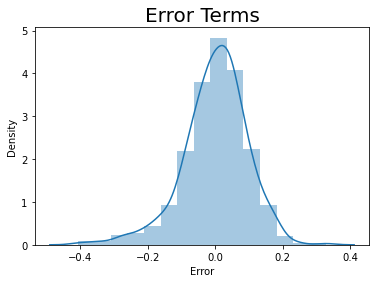

In [57]:
#Finding Resudual error
res = y_train - y_train_pred
sns.distplot(res,bins=15)
plt.title('Error Terms',fontsize=20)
plt.xlabel("Error")

1. Error terms are normally distributed with mean is equal to Zero. Our assumptions is correct

 ## Homoscedasticity

Text(0, 0.5, 'y_train_pred')

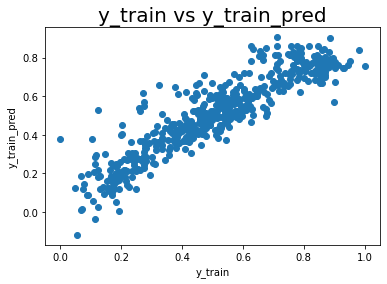

In [58]:
plt.scatter(y_train, y_train_pred)
plt.title('y_train vs y_train_pred',fontsize=20)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

1. It clearly shows that error terms has constant varaince.

# 8. Predictions and evaluation on test analysis

In [59]:
# scalling the test variables
num_vars = ['temp', 'atemp','hum', 'windspeed', 'cnt']

# Test data will be only  transformed not fit_transform
df_test[num_vars] = scaler.transform(df_test[num_vars])



In [60]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
192,0,0,1,0.926840,0.905521,0.574979,0.366672,0.487345,0,1,...,0,0,0,1,0,0,0,0,0,0
329,0,0,0,0.370379,0.390797,0.700943,0.094891,0.350437,0,0,...,1,0,0,0,0,0,0,1,0,0
314,0,1,0,0.301653,0.277051,0.458869,0.602557,0.384952,0,0,...,1,0,0,0,0,0,1,0,0,0
628,1,0,1,0.667454,0.662386,0.687661,0.271790,0.937069,0,1,...,0,0,0,0,0,0,1,0,0,0
238,0,0,0,0.774977,0.754791,0.874036,0.728193,0.125748,0,1,...,0,0,0,0,0,0,0,1,1,0


In [61]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.045662,0.634703,0.544886,0.537993,0.641986,0.341663,0.526097,0.269406,0.269406,...,0.091324,0.082192,0.164384,0.146119,0.118721,0.114155,0.136986,0.141553,0.337900,0.013699
std,0.500722,0.209229,0.482616,0.238570,0.234058,0.139188,0.158831,0.208742,0.444668,0.444668,...,0.288730,0.275286,0.371472,0.354034,0.324202,0.318728,0.344621,0.349389,0.474078,0.116503
min,0.000000,0.000000,0.000000,-0.050894,-0.053923,0.283633,0.047441,0.047055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.351583,0.354899,0.536419,0.228871,0.389439,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.552171,0.549511,0.648671,0.321782,0.523815,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746710,0.718818,0.735004,0.427798,0.673090,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.016627,1.053202,0.955442,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Creating X_test and y_test

In [62]:
y_test = df_test.pop('cnt')
X_test = df_test


In [63]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
192,0,0,1,0.926840,0.905521,0.574979,0.366672,0,1,0,...,0,0,0,1,0,0,0,0,0,0
329,0,0,0,0.370379,0.390797,0.700943,0.094891,0,0,1,...,1,0,0,0,0,0,0,1,0,0
314,0,1,0,0.301653,0.277051,0.458869,0.602557,0,0,1,...,1,0,0,0,0,0,1,0,0,0
628,1,0,1,0.667454,0.662386,0.687661,0.271790,0,1,0,...,0,0,0,0,0,0,1,0,0,0
238,0,0,0,0.774977,0.754791,0.874036,0.728193,0,1,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,0,0.498964,0.505508,0.517566,0.438458,1,0,0,...,0,0,0,0,0,0,0,1,0,0
111,0,0,1,0.318281,0.299049,0.750214,0.406392,1,0,0,...,0,0,0,0,0,0,1,0,1,0
520,1,0,1,0.589859,0.595422,0.630677,0.385888,1,0,0,...,0,0,0,1,0,0,0,0,1,0
407,1,0,0,0.040050,-0.021097,0.477720,0.797450,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Taking final columns of our model
col1 = X_train_rfe_7.columns
col1

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [65]:
# dropping constant variable before assign it to X test
col1 = col1.drop('const')

In [66]:
X_test = X_test[col1]


In [67]:
# adding a constant variable
X_test_new = sm.add_constant(X_test)

In [68]:
# predicting the value for the test dataset
y_test_pred = lm_6.predict(X_test_new)

In [69]:
#finding R2 value for Y_test and Y_test_predict
r2_score(y_true= y_test , y_pred = y_test_pred)

0.8037455383168342

In [70]:
X_test.shape

(219, 9)

In [71]:
# Formula for R^2 adjusted: R^2 adj = (1−(1−R^2)∗(n−1)/(n−p−1))

# Here, n is the rows & p is the columns

n = X_test.shape[0]
p = X_test.shape[1]
r2 =r2_score(y_true= y_test , y_pred = y_test_pred)
adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.795294389249138

Text(0, 0.5, 'y_test_pred')

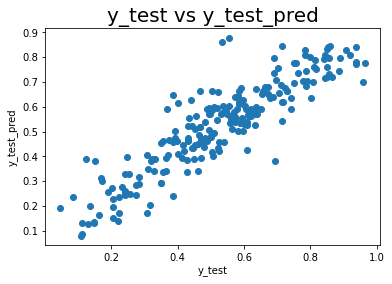

In [72]:
# Plotting y_test and y_pred to understand the spread.
plt.scatter(y_test,y_test_pred)
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

1. The R2 value of training dataset is 0.824 and test dataset is 0.803, which means both values are similar and it has Good R-squared value. Hence our model is good for both train and test dataset

# Equation for the Best fit line

In [73]:
round(lm_6.params,4)

const           0.1447
yr              0.2301
holiday        -0.1152
temp            0.5288
windspeed      -0.1189
season_2        0.0703
season_4        0.1240
mnth_9          0.0770
weathersit_2   -0.0768
weathersit_3   -0.2810
dtype: float64

# cnt = 0.1447 + (0.2301 * yr) + ((-0.1152)*holiday) + (0.5288 * temp) + ((-0.1189*windspeed)) + (0.0703 * season_2) + (0.1240 *season_4) + (0.0770 * mnth_9) + ((-0.0768) * weathersit_2) + ((-0.2810) * weathersit_3)

 1. Training R2  - 0.824
 2. Training adj R2 - 0.821
 3. Test R2 - 0.803
 4. Test adj R2 - 0.795

Overall both Train and Test R squared values are more than 80%, the model is significant. 

## The following  variables are top 3 peridictors for the bike demand
1. Temperature
2. Windspeed
3. Year 

1. All positive coefficients ( Year, Temperature, season_2, season_3, month_9) indicates that increase in these values, the targert variable 'cnt' will increase.
2. All Negative coefficients (holiday, windspeed, weathersit_2, weathersit_3) indicates that increase in these values, the target variable'cnt' will decrease.
3. Temperature is the most significant with largest coefficients compared to other variables.

Note :
1. season_2 - Summer 
2. season_3  - Fall
3. month_9  - September
4. weathersit_2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
5. weathersit_3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

## Suggestions to improve the bike demand:

1. We can give discounts on Summer and Fall seasons, the bike demand will increase.
2. Particularly on September month provide some offers/ discounts, the demand will definitly increase.
